In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm

In [3]:
DF = 'Review/23.03.07 avg. phase correlation/'
Create_Folder(DF)

In [251]:
N =500
# theta0 = np.ones_like(theta_random)
mean_r = lambda x: np.mean(x[-500:])
std_r = lambda x: np.std(x[-500:])
m = 6
Ks = np.arange(1,10,0.1)
seed =10
# theta,omega,Kc = Normal(N,0,1,seed=seed)
theta_random,omega,Kc = Q_Normal(N,0,1,seed=10)
omega = np.sort(omega)
df = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks),'rs':np.zeros_like(Ks)},index=Ks,dtype=object)
for i,(K,(df.theta[K],df.dtheta[K],df.rs[K])) in enumerate(zip(Ks,parmap.map(mf2,Ks,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega,pm_processes=8,pm_pbar=False))):pass
df['r_mean'] = df.rs.apply(mean_r)
df['r_std'] = df.rs.apply(std_r)    

In [248]:
Draw_ = DD(m)

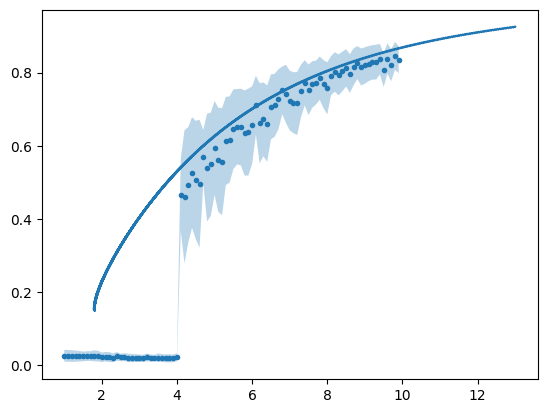

In [252]:
# plt.errorbar(Ks,df.r_mean,df.r_std)
Draw_.foward()
plt.fill_between(Ks,df.r_mean-df.r_std,df.r_mean+df.r_std,alpha= 0.3)
plt.plot(Ks,df.r_mean,'.')

In [254]:
# theta_ = df.iloc[idx].theta[7000:7000,:]
theta_ = df.iloc[np.argmax(df.r_std)].theta[12000:13000,:]
dtheta_ = df.iloc[np.argmax(df.r_std)].dtheta[12000:13000,:]
dtheta = df.iloc[np.argmax(df.r_std)].dtheta

In [255]:
Aij = np.zeros((500,500))
Pij = np.zeros_like(1j*Aij)
for t_ in theta_:
    i,j = np.meshgrid(t_,t_)
    Pij += np.exp(1j*(i-j))
aPij = np.abs(Pij)/100

In [256]:
def make_phase_avg_correlation(idx):
    theta_ = df.iloc[idx].theta[-1000:,:]
    Aij = np.zeros((500,500))
    Pij = np.zeros_like(1j*Aij)
    for t_ in theta_:
        i,j = np.meshgrid(t_,t_)
        Pij += np.exp(1j*(i-j))
    aPij = np.abs(Pij)/1000
    return aPij

In [33]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,5000,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

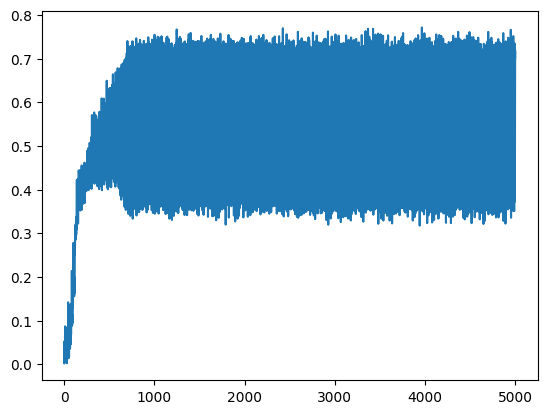

In [34]:
plt.plot(t,rs)

In [8]:
del dtheta

In [9]:
Aij = np.zeros((500,500))
Pij = np.zeros_like(1j*Aij)
for t_ in theta_:
    i,j = np.meshgrid(t_,t_)
    Pij += np.exp(1j*(i-j))
    

In [10]:
aPij = np.abs(Pij)/1000

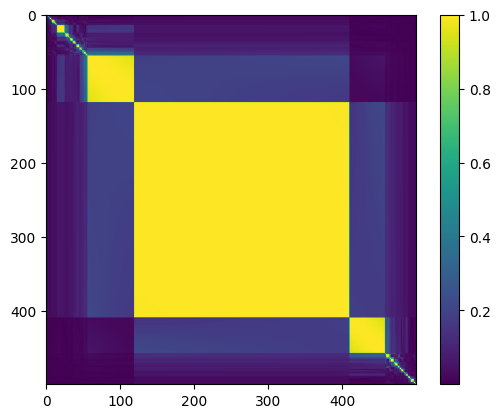

In [11]:
plt.imshow(aPij)
plt.colorbar()

In [270]:
theta_ = df.iloc[np.argmax(df.r_std)].dtheta[7000,:]

In [271]:
i_d,j_d = np.meshgrid(theta_,theta_)

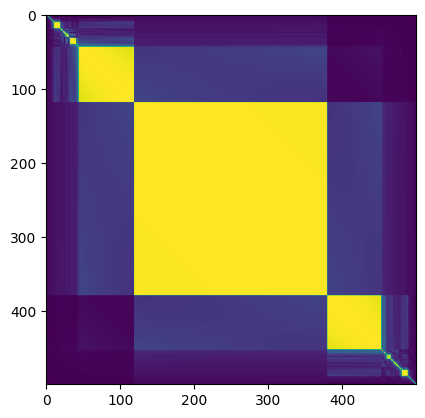

In [272]:
plt.imshow(aPij)

In [12]:
Aij = np.zeros((len(theta_),500,500),'complex128')
exp_theta = np.exp(1j*theta_)
for i,e_ in enumerate(exp_theta):
    i_,j_ = np.meshgrid(e_,e_)
    Aij[i,:,:] = i_/j_
Pij = np.abs(np.sum(Aij,axis=0))/len(theta_)

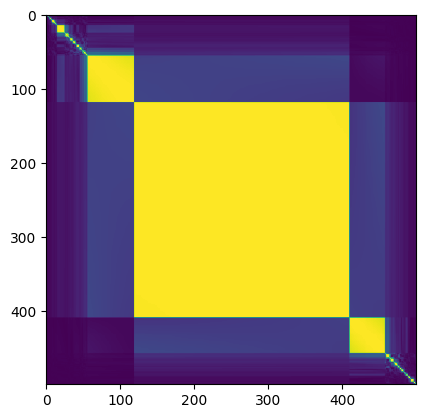

In [17]:
plt.imshow(aPij)

In [32]:
time = 1000
i = 0
data = []
data.append( np.mean(dtheta_[i:i+time],axis=0))
max_idx = len(dtheta_)
for i in range(1,max_idx-time):
    data.append(np.mean(dtheta_[i:i+time],axis=0))


NameError: name 'dtheta_' is not defined

In [540]:
data = np.array(data)

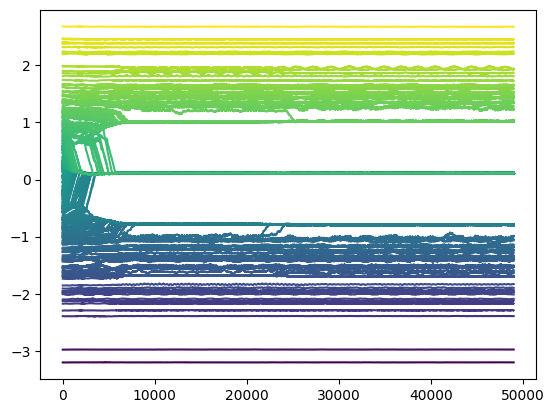

In [541]:
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
ln = plt.plot(data);
for i,l in enumerate(ln):
    l.set_color(color[i])

In [18]:
Aij = np.zeros((len(theta_),500,500),'complex128')
exp_theta = np.exp(1j*theta_)
for i,e_ in enumerate(exp_theta):
    i_,j_ = np.meshgrid(e_,e_)
    Aij[i,:,:] = i_/j_
Pij = np.abs(np.sum(Aij,axis=0))/len(theta_)

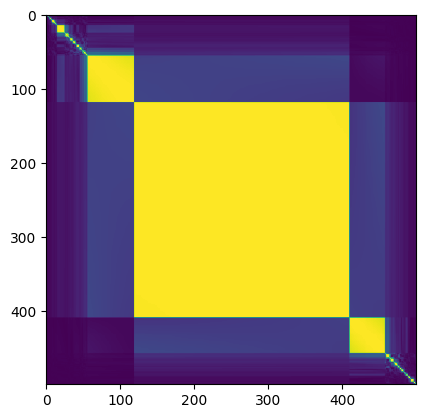

In [19]:
plt.imshow(Pij)

In [20]:
t_ = theta_[-1,:]
i_t,j_t = np.meshgrid(t_,t_)

In [21]:
aPij = np.abs(Pij)/1000

Text(0.5, 0.98, 'K=3.5, m = 6')

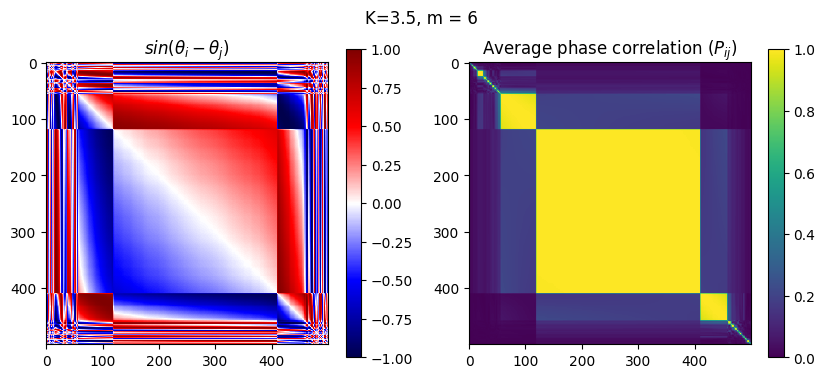

In [22]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(10,4))
plt.sca(ax1)
plt.imshow(np.sin(i_t-j_t),vmin=-1,vmax=1,cmap = 'seismic')
plt.colorbar()
plt.title(r'$sin(\theta_i-\theta_j)$')
plt.sca(ax2)
plt.imshow( Pij,vmin=0,vmax=1)
plt.title(r'Average phase correlation ($P_{ij}$)')
plt.colorbar()
plt.suptitle(f'K={K}, m = {m}')

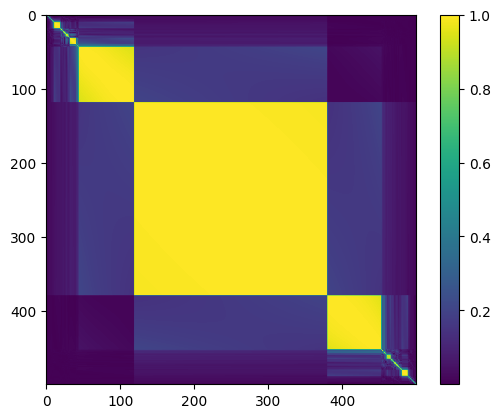

In [294]:
# linear, log, symlog, asinh, logit, function, functionlog
plt.imshow(aPij)
plt.colorbar()

In [27]:
temp = aPij.copy()

In [28]:
temp1 = np.where(temp>0.7,1,0)

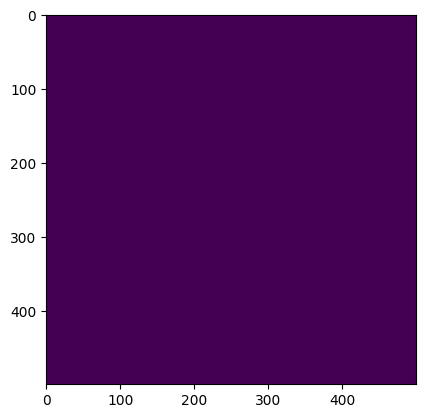

In [29]:
plt.imshow(temp1)

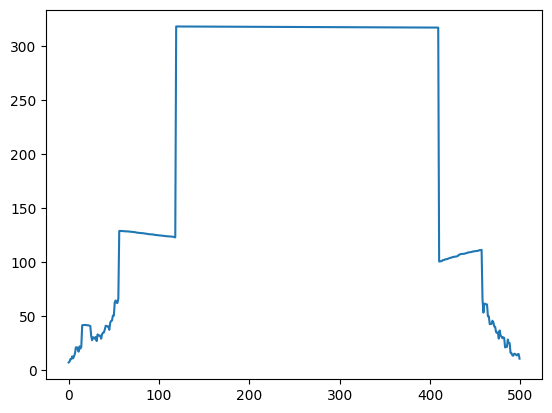

In [31]:
plt.plot(np.sum(Pij,axis=1))


(array([  2.,   8.,  32.,  14.,  64., 283.,  29.,  45.,  13.,  10.]),
 array([-3.19549336, -2.59841297, -2.00133259, -1.40425221, -0.80717182,
        -0.21009144,  0.38698894,  0.98406933,  1.58114971,  2.1782301 ,
         2.77531048]),
 <BarContainer object of 10 artists>)

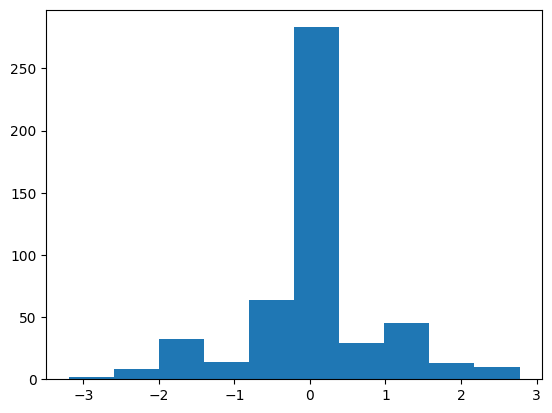

In [218]:
plt.hist(dtheta.T[:,-1])

(array([ 64.,  45.,  53.,  20.,  55.,   0.,   0.,   0.,   0., 263.]),
 array([0.00863905, 0.06458424, 0.12052944, 0.17647464, 0.23241983,
        0.28836503, 0.34431023, 0.40025542, 0.45620062, 0.51214582,
        0.56809101]),
 <BarContainer object of 10 artists>)

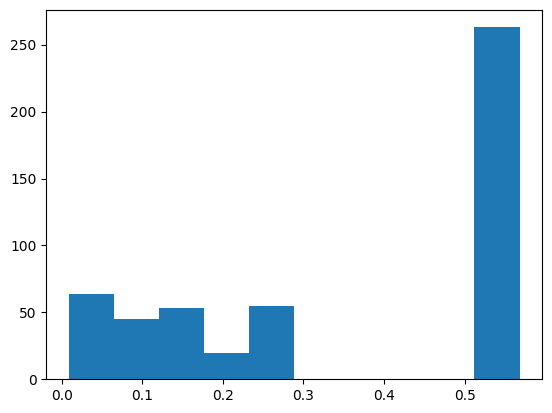

In [165]:
plt.hist(np.mean(aPij,axis=1),bins=10)

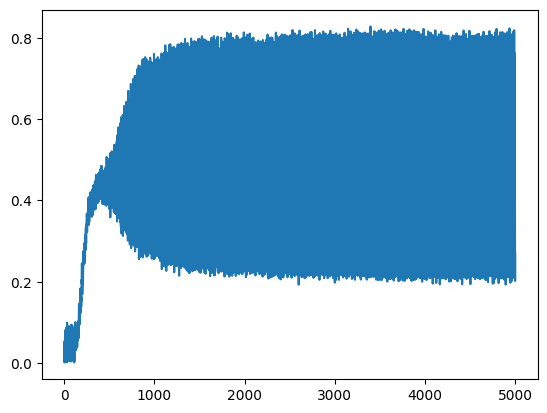

In [282]:
plt.plot(t,rs)

In [548]:
time = 200
i = 0
rstd = np.mean(rs[i:i+time],axis=0)
max_idx = len(dtheta)
for i in range(1,max_idx-time):
    rstd= np.r_[rstd,np.mean(rs[i:i+time],axis=0)]

In [549]:
rstd[-1]

0.5104986898009798

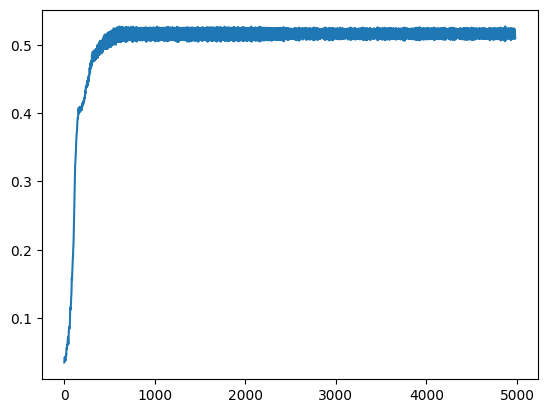

In [550]:
plt.plot(t[:-200],rstd)

# animation 만들기

In [7]:
seed =10
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 6
t = np.arange(0,1500,0.1)
K = 3.5
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

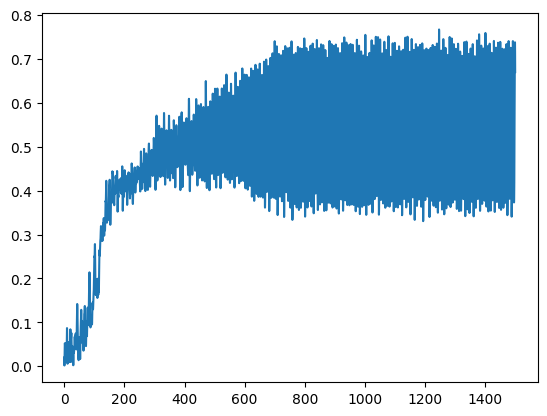

In [8]:
plt.plot(t,rs)

In [9]:
theta_ = theta[6000:10000]

In [10]:
Aij = np.zeros((len(theta),500,500),'complex128')
exp_theta = np.exp(1j*theta)
for i,e_ in enumerate(exp_theta):
    i_,j_ = np.meshgrid(e_,e_)
    Aij[i,:,:] = i_/j_
# Pij = np.abs(np.sum(Aij,axis=0))/len(theta_)

: 

: 